# Classificação de Imagens do Conjunto de Dados MNIST

### Bibliotecas

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

### Importação do Dataset

In [2]:
# carregar o dataset MNIST diretamente do TensorFlow
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
# transformar em dicionário
mnist = {
    "data": X_train,  # dados de treinamento (imagens)
    "target": y_train  # rótulos de treinamento
}

In [4]:
X, y = mnist["data"], mnist["target"]

print("Tamanho dos dados de treinamento:", X.shape)
print("Tamanho rótulos de treinamento:", y.shape)

Tamanho dos dados de treinamento: (60000, 28, 28)
Tamanho rótulos de treinamento: (60000,)


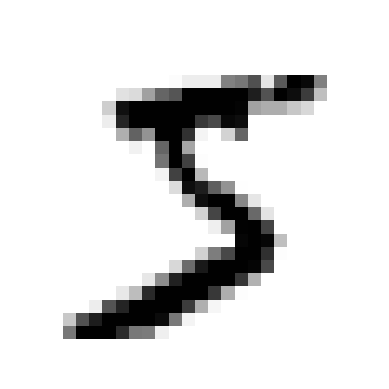

In [5]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [6]:
y[0]

5

O rótulo é uma string, mas os modelos de machine learning esperam que sejam inteiros

In [7]:
y = y.astype(np.uint8)

### Separação do conjunto de dados

In [8]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### Treinando Classificador Binário

In [9]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

### Treinar o Classificador (Gradiente Descendente Estocástico)

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(random_state=42)

X_train = X_train.reshape(X_train.shape[0], -1)

sgd.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

### Desempenho do Modelo

In [11]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

A acurácia não é a melhor medida de desempenho, principalmente em conjuntos de dados assimétricos

#### Matriz de Confusão

In [12]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd, X_train, y_train_5, cv=3)

In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5, y_train_pred)
print(cm)


[[53892   687]
 [ 1891  3530]]


#### Precisão e Revocação

In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [15]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [18]:
f1_score(y_train_5, y_train_pred) # combinação de precisão e revocação

0.7325171197343846

## Curva ROC

In [ ]:
from sklearn.metrics import roc_curve

y_scores = cross_val_predict(sgd, X_train, y_train_5, cv=3,
                             method="decision_function")

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

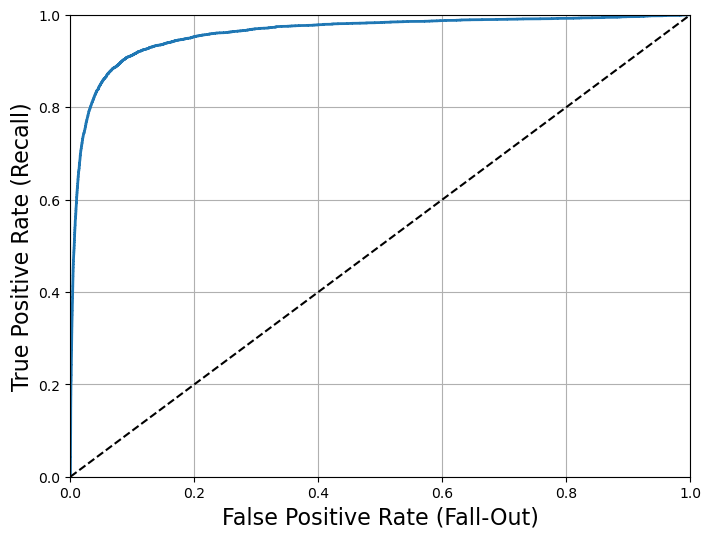

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.axis([0, 1, 0, 1])                                    
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=16) 
    plt.ylabel('True Positive Rate (Recall)', fontsize=16)    
    plt.grid(True)                                           

plt.figure(figsize=(8, 6))                              
plot_roc_curve(fpr, tpr)                                    
plt.show()

In [23]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9604938554008616

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [25]:
y_scores_forest = y_probas_forest[:, 1] # score das classes positivas 
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

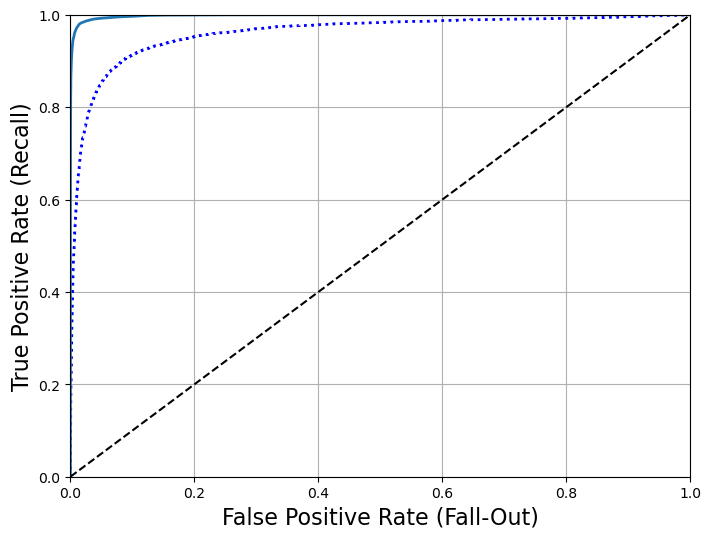

In [26]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.show()